<a id='top'></a>

# CSCI3022 F20
# Homework 7: Hypothesis Testing
***

**Name**:John Ortiz

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 1: A One-Sample Hypothesis


You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

$H_0 : \mu = 10 $ minutes \
$H_a : \mu > 10 $ minutes 

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?


In [2]:
alpha=.05
print("Z_.05 = " +str(stats.norm.ppf(1-alpha)))

Z_.05 = 1.6448536269514722


Note:\
i)Type I error refers to when we reject $H_0$ however $H_0$ is true. \
ii)We know $\mu $ and $\sigma^2$ \
$\sigma^2 = \frac{1}{\lambda^2} = \frac{1}{(\frac{1}{10})^2} = 100$ \
$\mu = 10$ <br> 
Hence, for an arbrituary X, where we reject if X > c (as stated in the question): \
we can represent X ~ $N(\mu,\sigma^2)$ \

we will represent X ~ $Z_{H_{a}} = \frac{x - \mu}{\sigma/\sqrt(n)} = \frac{x - \mu}{\sqrt(\sigma^2)} =\frac{x - 10}{\sqrt(100)} =\frac{x - 10}{10} $ \
So to calculate what value c will need to be to reject if X >c with $\alpha=.05$ we need to set the $Z_{H_{a}} > Z_{.05} $ \
$ \frac{x - 10}{10} > 1.6449 $
$\to x - 10 > 16.449 $ \
$\to x > 26.449 $ \
So are test is now formed: "reject if X > c", where $c \approx 26.449$. This means we would reject the null hypothesis if the bus arrives anytime greater than 26.449 

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)


In [3]:
print("Beta = " +str(stats.norm.cdf(-.5592)))

Beta = 0.2880126165753519


Note:  
i) we reject $H_0$ if x > 26.449 \
ii) $ \sigma^2 = 360 \to \sigma = 60$ \
P(Type II error) =$\beta$ =  P(Do not reject $H_0$ $\mid \mu = 60$) = P(X <= 26.449 $\mid \mu = 60$)   
= P($Z <= \frac{26.449 - 60}{60}$) = P($Z <= -.5592$) = .2880 \
Power = $1 -\beta = 1 -.2880 = .7120$ 







**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?





In [4]:
print("Probability we reject Ho: " +str(1-stats.norm.cdf(-.6483)))

Probability we reject Ho: 0.7416045329838252


Note:  
i) we reject $H_0$ if x > 26.449 \
ii)  For the true continuous uniform distribution $\mu=1/2(b-a)=1/2(60-0)=30, \sigma^2 = 1/12(b-a)^2=1/12(360)=30, \to \sigma = \sqrt{30}$  \
P(Reject $H_0$) = P($Z > \frac{26.449 - 30}{\sqrt{30}}$)=P($Z > -.6483$) = .7416 \
The difference about this is a Type II error is when we fail to reject $H_0$ and $H_0$ is false, power is the same however $H_0$ is true. For the question asked above we are focusing if we do reject $H_0$ with $H_0$ being false. \
Sidenote:
If $H_0$ were true the question would be asking for the P(Type I Error).


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 2: Choosing your error levels

Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


Scientists misuse p-values by mainly equating a smaller p-value than .05 as an outcome to use in actual decision making. The big problem with this is p-value by itself is not a good indication by itself of statistical significance. I think it is good suggestion, but I think that we should go with a longer term solution. I would more advocate for an alternative method such as the use of bayesian statistic. Other suggestions include training the scientific work force, focusing on the p-values size and uncertainty, and addressing biases that lead to inflated results.

---

<a id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3 - Some Quick Hitters

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You're Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russell fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

In [5]:
def hitGoal(list1):
    count=0
    goalCards = ["6 h","8 d","13 c","0 j","0 j"]
    backUp=[]
    for i in range(len(list1)):
        for j in range(len(goalCards)):
            if(list1[i] == goalCards[j]):
                count+=1
                backUp.append(list1[i])
                break
    if(count>5):
        print("This should never happen!!!!!!!!")
        return False
    elif((count>=4) and (count<=5)):
        return True
    else:
        return False
    



def simulateOne(tempCards):
    pickedCards =[]
    cards = tempCards.copy()
    cardCount = 0
    hit4_5 = False
    #print("----------------------------------------------------")
    while(not hit4_5):
        card =np.random.choice(cards,size=1,replace=False)
        #print("This is the selected card: " + str(card))
        pickedCards.append(card[0])
        cards.remove(card[0])
        #print("Length of Updated Cards List: " +str(len(cards)))

        #increment count
        cardCount += 1
        #print("Cards Flipped: " + str(cardCount))
        #print(str(pickedCards))
        #print(hitGoal(pickedCards))
        #print("")
        hit4_5 = hitGoal(pickedCards)  
    return cardCount



outcomes =[]
faceValue = np.array(range(1,14,1))
suitValue = np.array(["h","s","c","d"])
cards = []
for i in suitValue:
    for j in faceValue:
        temp = str(j)+str(" ")+ str(i)
        cards.append(str(temp))
joker = "0 j"
cards.append(joker)
cards.append(joker)

nSamp = 25000

for i in range(nSamp):
    
    sim = simulateOne(cards)
    outcomes.append(sim)
#print(outcomes)


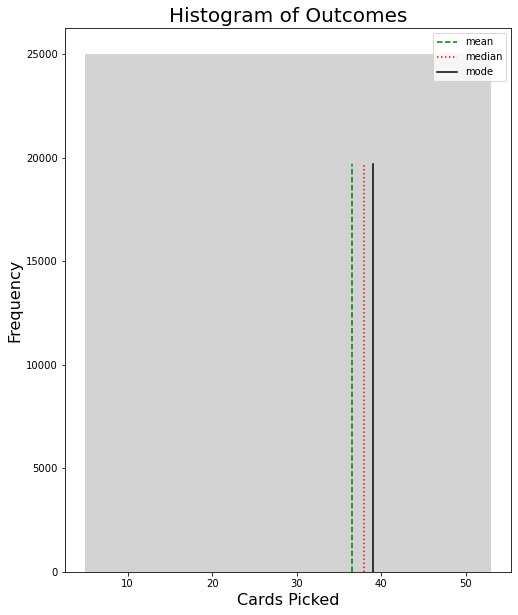

In [6]:
mean = np.array(outcomes).mean()
median = np.median(outcomes)
mode = stats.mode(outcomes)

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8,10))
plt.hist(outcomes,bins=1,color="lightgrey")

ax.set_title('Histogram of Outcomes',fontsize=20)
ax.set_ylabel('Frequency',fontsize=16)
ax.set_xlabel('Cards Picked',fontsize=16)
plt.axvline(x=mean,color="green",ymax=.75,ls='--')
plt.axvline(x=median,color="red",ymax=.75,ls='dotted')
plt.axvline(x=mode[0][0],color="black",ymax=.75,ls='-')
plt.legend(labels=["mean","median", "mode"])


The mean is less than the median, so it is negatively skewed. The shape of the histogram is uniformly distributed which is to be expected with a bin size of 1.

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

In general the 99% confidence interval will be wider than the 95% confidence interval. As the percentage of our confidence increases, it stands to stay the scope of which we say the true value lies would need to increase as well. I would explain this to a younger sibling as follows:  The bigger confidence interval will be wider because as are confidence level increase we will need to expand the area that possibly holds the right value. 

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by different "statistical measures". Compute a 95% confidence interval for the _mean_.


In [7]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
xBar = smith.mean()
print("XBar: " +str(xBar))
talpha = stats.t.ppf(.95,11-1)
print("talpha: "+ str(talpha))
s = np.sqrt(np.var(smith,ddof =1))
print("standard deviation: "+ str(s))
n = len(smith)
print("n: "+ str(n))
lowBound = xBar - (talpha * (s/n))
upperBound = xBar + (talpha * (s/n))
print("(   " + str(lowBound) + " , " +str(upperBound)+ " )")

XBar: 0.29175636363636365
talpha: 1.8124611228107335
standard deviation: 0.20180819840991235
n: 11
(   0.2585045896470508 , 0.3250081376256765 )


Note: 
- X is normally distributed
- sample size is small 
- standard deviation is estimating $\sigma$

So we need to use the t distribution !!!
CI Formula for T-Distribution: 
$ (\bar{X} - t_{\alpha/2,v} * \frac{s}{\sqrt{n}}, \bar{X} + t_{\alpha/2,v} * \frac{s}{\sqrt{n}} )$ \
95% CI $= (.2918 - 1.8125 * \frac{.1924}{\sqrt{11}}, .2918 + 1.8125 * \frac{.1924}{\sqrt{.1924}} )$ \
$\to (.2585, .3250)$


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


Note:
Type II error is when we fail to reject  $𝐻_0$  and  $𝐻_0$  is false \
Type I Error: if we do reject  $𝐻_0$  with  $𝐻_0$  being true. \
$H_0$: avg strength of carbon fiber -> $\mu_a = \mu$  \
$H_a$: avg strength below tolerance -> $\mu_a < \mu$ \
So in words, a type I error would be if we say the strength of carbon is "below tolerance" or unsafe and in reality it is fine. This error would not be the worst to have.  A type II error would be if we said the strength of carbon is fine and in reality it actually "below tolerance". This error would definity want to be minimized since this error could lead to injury or even death.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

Data Given: \
X ~ distribution of width of baby reef octopuses \
n=49, note n>30 can approximate as a normal \
meanX= 47.2 mm \
stdX = 29.2 mm \
Y ~ distribution of width of baby dumbo octopuses \
m=65, note m>30 can approximate as a normal \
meanY= 63.9 mm \
stdY = 19.6 mm \
97.5 % CI: (($\bar{Y} - \bar{X} -7) - z_{\frac{\alpha}{2}}* \sqrt{\frac{s^2_x}{n}+\frac{s^2_y}{m}}, (\bar{Y} - \bar{X}) + z_{\frac{\alpha}{2}}* \sqrt{\frac{s^2_x}{n}+\frac{s^2_y}{m}})$

In [8]:
ybar_Minus_xBar = 63.9 - 47.2 -7
alpha=.025
zstat=stats.norm.ppf(1-alpha/2)
s= np.sqrt((np.power(29.2,2)/49)+ (np.power(19.6,2)/65))
lowBound = ybar_Minus_xBar - (zstat * s)
upBound = ybar_Minus_xBar + (zstat * s)

print("97.5% CI: ( " + str(lowBound) + " , " +str(upBound)+ " )")

97.5% CI: ( -1.1218141299626403 , 20.52181412996263 )


The 97.5% CI represents the difference of widths. So our CI is saying that if we simulate creating the Confidence Intervals n amount of times than 97.5%% of those CI will have the true means difference is inside it. Knowing this we can see 0 lies within the 97.5% CI  than we can say there is statistical evidence that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm.

---

<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4 - Maybe we actually do some tests now?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

CI Formula for T-Distribution: 
$ (\bar{X} - t_{\alpha/2,v} * \frac{s}{\sqrt{n}}, \bar{X} + t_{\alpha/2,v} * \frac{s}{\sqrt{n}} )$ 

In [9]:
def printCI(xBar,std,n, group):
    tstat = stats.t.ppf(.975,n-1)
    #print("talpha: "+ str(tstat))
    s = std/np.sqrt(n)
    lowBound = xBar - (tstat * s)
    upBound = xBar + (tstat * s)
    print(group+" 97.5% CI: ( " + str(lowBound) + " , " +str(upBound)+ " )")
printCI(451.3,31.9,15,"Coffee+Nap")
printCI(494.2,39.6,15,"Coffee")
printCI(492.8,45.2,15,"Nap")

Coffee+Nap 97.5% CI: ( 433.63436882408797 , 468.96563117591205 )
Coffee 97.5% CI: ( 472.2702509540402 , 516.1297490459598 )
Nap 97.5% CI: ( 467.7690743212782 , 517.8309256787218 )


1) I can not make any definitive conclusions on coffee, naps, or both because we were asked to only compute each CI separately. Alot more information if we were to subtract two of the threes mean and then repeat till all difference CI are created. I would like to note that from the CI Coffee+Nap upper bound is around the same lower bound of both other groups. This would lead be to have strong intuition that Coffee+Nap is not the best on reaction time.\
2) We used t-distribution beacause for each group the three criteria below were met:
- found to be normally distributed prior
- sample size is small (n<30)
- s is estimating $\sigma$ (comes from sample) 



**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$\theta$ represents the reaction time, denoting each group with a letter (coffee - c, nap -n , coffee+nap - cn) \
$H_0: \theta_n = \theta_c$ \
$H_a: \theta_n < \theta_c$ \
So in english this means are null hypothesis is that taking a nap has the same reaction time as drinking coffee. As for the alternative hypothesis it is that taking a nap does promotes a faster reaction time than drinking coffee.\
Note:
- In this hypothesis test we are using the coffee's group mean as our "true mean"
    - $H_0: \theta_n = 494.2$ 
    - $H_a: \theta_n < 494.2$ 
- This also means that since we are using the coffees's group as the population we use the standard deviation produced from the coffee's group<br> 
<br>
To test this all we need is the $t_\alpha$, where $\alpha= .025$ and the t-score produced by using the naps mean as $\bar{x}$ and normalizing with are true mean and standard deviation. If the t-score < -$t_\alpha$, then we will reject the null hypothesis.<br>
$t_{score} = \frac{xBar - \mu}{\frac{s}{\sqrt{n}}}$

In [10]:
alpha = .025
n=15
talpha = stats.t.ppf(alpha,n-1)
print("t_alpha: " +str(talpha))
def getTscore(xBar,mu,s,n):
    tScore = (xBar - mu)/(s/np.sqrt(n))
    return tScore
tscore= getTscore(492.8,494.2,39.6,n)
print("t_score: " +str(tscore))
print(str(tscore) +" > "+ str(talpha))
print("(tscore > -talpha) -> we fail to reject the null hypothesis!!!" )

t_alpha: -2.1447866879169277
t_score: -0.13692365365379533
-0.13692365365379533 > -2.1447866879169277
(tscore > -talpha) -> we fail to reject the null hypothesis!!!


Since we fail to reject the null hypothesis than we can say there is insufficient evidence to conclude that taking a nap promotes faster reaction time than drinking coffee, with an $\alpha =.025$ .

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

We will split this into to separate hypothesis tests based on which group we are comparing: Hypothesis Test 1- "taking a coffee-nap promotes faster reaction time than only drinking coffee" and Hypothesis Test 2 - "taking a coffee-nap promotes faster reaction time than only having a nap" \

Note: $\theta$ represents the reaction time, denoting each group with a letter (coffee - c, nap -n , coffee+nap - cn) \
**Hypothesis Test 1**

$H_0: \theta_{cn} = \theta_c$ \
$H_a: \theta_{cn} < \theta_c$ 

- In this hypothesis test we are using the coffees group mean as our "true mean"
    - $H_0: \theta_n = 494.2$ 
    - $H_a: \theta_n < 494.2$ 
- This also means that since we are using the coffees's group as the population we use the standard deviation produced from the coffee's group (39.6) 
<br>
In other words are null hypothesis is that drinking a cup of coffee has the same reaction time as drinking coffee and taking a nap. As for the alternative hypothesis it is that drinking coffee and taking a nap promotes a faster reaction time than drinking coffee only.<br>

<br>
To test this all we need is the $t_\alpha$, where $\alpha= .025$ and the t-score produced by using the naps mean as $\bar{x}$ and normalizing with are true mean and standard deviation. If the t-score < $-t_\alpha$, then we will reject the null hypothesis.<br>


In [11]:
# coffee-nap versus coffee

#reinstantiating for sanity 
alpha = .025
n=15
talpha = -stats.t.ppf(1-alpha,n-1)
print("t_alpha: " +str(talpha))

tscore= getTscore(451.3,494.2,39.6,n) #using function built in b) we can use to calculate the t-score  ->getTscore
print("t_score: " +str(tscore))
print(str(tscore) +" < "+ str(talpha))
print("(tscore < -talpha) -> we will reject the null hypothesis!!!" )

t_alpha: -2.1447866879169273
t_score: -4.195731958391366
-4.195731958391366 < -2.1447866879169273
(tscore < -talpha) -> we will reject the null hypothesis!!!


Since we rejected the null hypothesis than we can say there is sufficient evidence to conclude that taking a coffee+nap promotes faster reaction time than drinking coffee alone, with an  𝛼=.025.

**Hypothesis Test 2**

$H_0: \theta_{cn} = \theta_n$ \
$H_a: \theta_{cn} < \theta_n$ 

- In this hypothesis test we are using the nap's group mean as our "true mean"
    - $H_0: \theta_n = 492.8$ 
    - $H_a: \theta_n < 492.8$ 
- This also means that since we are using the nap's group as the population we use the standard deviation produced from the nap's group (45.2) 
<br>
In other words are null hypothesis is that taking a nap has the same reaction time as drinking coffee and taking a nap. As for the alternative hypothesis it is that drinking coffee and taking a nap promotes a faster reaction time than taking a nap only.<br>

<br>
To test this all we need is the $t_\alpha$, where $\alpha= .025$ and the t-score produced by using the naps mean as $\bar{x}$ and normalizing with are true mean and standard deviation. If the t-score < $-t_\alpha$, then we will reject the null hypothesis.<br>


In [12]:
# coffee-nap versus nap

#reinstantiating for sanity 
alpha = .025
n=15
talpha = -stats.t.ppf(1-alpha,n-1)
print("t_alpha: " +str(talpha))

tscore= getTscore(451.3,492.8,45.2,n) #using function built in b) we can use to calculate the t-score  ->getTscore
print("t_score: " +str(tscore))
print(str(tscore) +" < "+ str(talpha))
print("(tscore < -talpha) -> we will reject the null hypothesis!!!" )

t_alpha: -2.1447866879169273
t_score: -3.5559470988408806
-3.5559470988408806 < -2.1447866879169273
(tscore < -talpha) -> we will reject the null hypothesis!!!


Since we rejected the null hypothesis than we can say there is sufficient evidence to conclude that taking a coffee+nap promotes faster reaction time than taking a nap alone, with an 𝛼=.025.

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

$\sqrt{\frac{(n-1)s^2}{\chi^2_{\alpha/2,n-1}}} \leq \sigma \leq \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\alpha/2,n-1}}}$, we use this formula b/c we are calculating a CI for standard deviation not mean with n<30.

In [13]:
#stats.chi2.ppf(alpha/2, n-1)
alpha = .025
n=15
s= 31.9 
chi_low= stats.chi2.ppf(1-alpha/2, n-1)
chi_high=stats.chi2.ppf((alpha/2), n-1)
#print("chiHigh:" +str(chi_high))
#print("chiLow:" +str(chi_low))
lowBound = np.sqrt( ((n-1)*np.power(s,2)) / (np.power(chi_low,2)))
highBound = np.sqrt( ((n-1)*np.power(s,2)) / (np.power(chi_high,2)))
print(" 97.5% CI: ( " + str(lowBound) + " , " +str(highBound)+ " )")


 97.5% CI: ( 4.199532915752177 , 24.492826515410734 )
